# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)
len(cities)

['jamestown', 'souillac', 'udachnyy', 'vila franca do campo', 'bambous virieux', 'albany', 'ushuaia', 'altamira', 'atuona', 'rio verde de mato grosso', 'qaanaaq', 'filotion', 'bredasdorp', 'kapaa', 'belushya guba', 'barentsburg', 'berlevag', 'razole', 'machilipatnam', 'clyde river', 'mataura', 'katsuura', 'tutoia', 'inderborskiy', 'butaritari', 'severo-kurilsk', 'bluff', 'touros', 'arraial do cabo', 'kampot', 'hermanus', 'lalomanu', 'hilo', 'toliary', 'amderma', 'yulara', 'busselton', 'esperance', 'batemans bay', 'gambela', 'nome', 'mbale', 'somvarpet', 'provideniya', 'pochutla', 'bama', 'punta arenas', 'rikitea', 'alice springs', 'cape town', 'tabou', 'yellowknife', 'nanortalik', 'fairbanks', 'vilyuysk', 'guane', 'victoria', 'new norfolk', 'salalah', 'sao joao batista', 'tiksi', 'katobu', 'sinjar', 'aklavik', 'monkey bay', 'busca', 'menongue', 'mount gambier', 'diu', 'kavieng', 'wenatchee', 'kharhial', 'mar del plata', 'boden', 'taolanaro', 'port elizabeth', 'norman wells', 'gudalur',

608

In [4]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

#api calls

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = weather_api_key


query_url = f"{url}appid={key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
# Added a try loop to catch cities that don't return results, had it append a null value instead of an error
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        id = response['id']
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print (f"{city} ID: {id} has been pulled from Open Weather Map")
    except (KeyError, IndexError):
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        print(f"{city} not found, going to keep going!")

pen Weather Map
codrington ID: 2171099 has been pulled from Open Weather Map
azimur not found, going to keep going!
kaitangata ID: 2208248 has been pulled from Open Weather Map
derzhavinsk ID: 1524606 has been pulled from Open Weather Map
sorvag not found, going to keep going!
webuye ID: 178202 has been pulled from Open Weather Map
dali ID: 1814093 has been pulled from Open Weather Map
halalo not found, going to keep going!
grand river south east not found, going to keep going!
hasaki ID: 2112802 has been pulled from Open Weather Map
omboue ID: 2396853 has been pulled from Open Weather Map
portland ID: 5746545 has been pulled from Open Weather Map
oistins ID: 3373652 has been pulled from Open Weather Map
lamu ID: 189741 has been pulled from Open Weather Map
oum hadjer ID: 2426370 has been pulled from Open Weather Map
tahta ID: 347634 has been pulled from Open Weather Map
college ID: 5859699 has been pulled from Open Weather Map
kavaratti ID: 1267390 has been pulled from Open Weather Ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#pull data from api key into a csv

weather_dict = {"City":cities,
               "Latitude":lat,
               "Longitude":lng,
               "Max Temp":max_temp,
               "Humidity":humidity,
               "Cloudiness":cloudiness,
               "Wind Speed":wind_speed}

# Data Frame
weather_df = pd.DataFrame(weather_dict)

# Drop NA rows
weather_df = weather_df.dropna()
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,jamestown,42.10,-79.24,57.20,82.0,1.0,6.93
1,souillac,-20.52,57.52,69.80,73.0,20.0,6.93
2,udachnyy,66.42,112.40,51.80,40.0,0.0,6.71
3,vila franca do campo,37.72,-25.43,64.40,72.0,40.0,13.87
4,bambous virieux,-20.34,57.76,73.99,73.0,20.0,6.93


In [7]:
weather_df[weather_df.Humidity > 100].sort_values(['Humidity'], ascending=False)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no city over 100%

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# no humidity outliers - skiping this step 

In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv('city_data.csv', index=False) 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

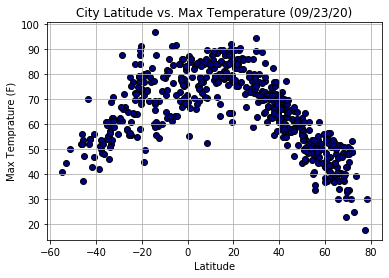

In [9]:

# Create a scatter plot for latitude and temprature relationship 
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("temperature.png")
plt.show()

## Latitude vs. Humidity Plot

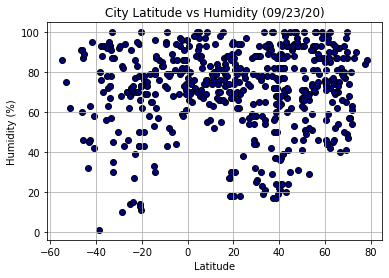

In [10]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

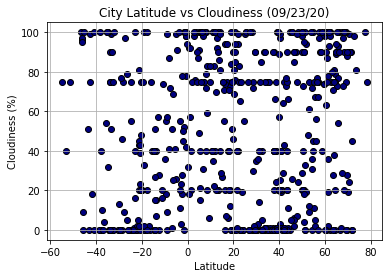

In [11]:

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

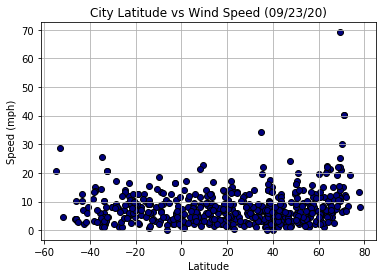

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("wind_speed.png")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
import scipy.stats as stats

def Lin_Reg(latitude, variable):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, variable)
    regress_values = latitude * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(latitude, variable)
    plt.plot(latitude,regress_values,"r-")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
Northern_df = weather_df.loc[(weather_df["Latitude"]>0),:]
Southern_df = weather_df.loc[(weather_df["Latitude"]<0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

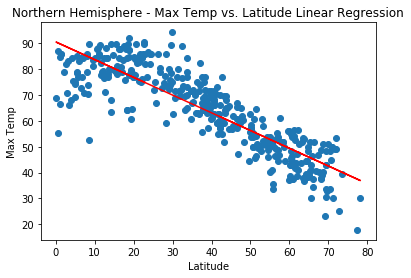

In [17]:
Lin_Reg(Northern_df["Latitude"],Northern_df["Max Temp"])

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

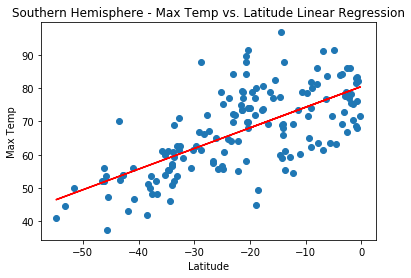

In [18]:
Lin_Reg(Southern_df["Latitude"],Southern_df["Max Temp"])

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

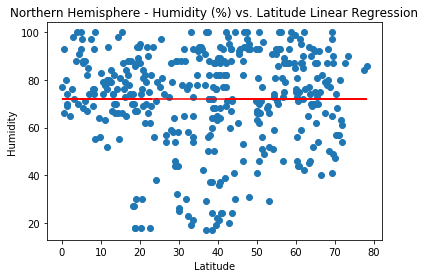

In [19]:
 Lin_Reg(Northern_df["Latitude"],Northern_df["Humidity"])

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

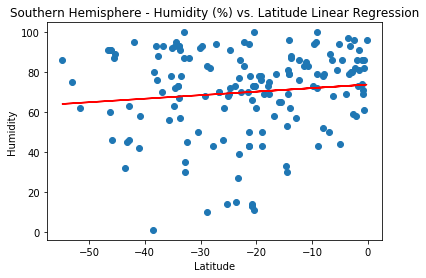

In [20]:
Lin_Reg(Southern_df["Latitude"],Southern_df["Humidity"])

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

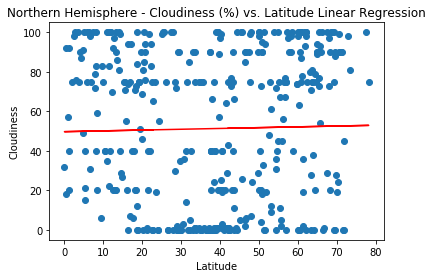

In [21]:
 Lin_Reg(Northern_df["Latitude"],Northern_df["Cloudiness"])

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

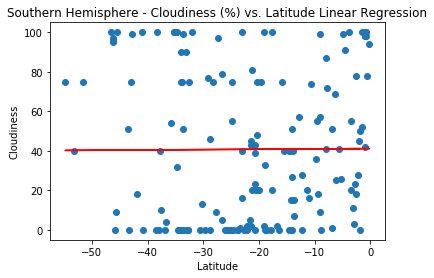

In [22]:
Lin_Reg(Southern_df["Latitude"],Southern_df["Cloudiness"])

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

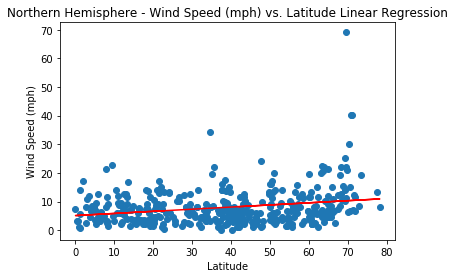

In [23]:
Lin_Reg(Northern_df["Latitude"],Northern_df["Wind Speed"])

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

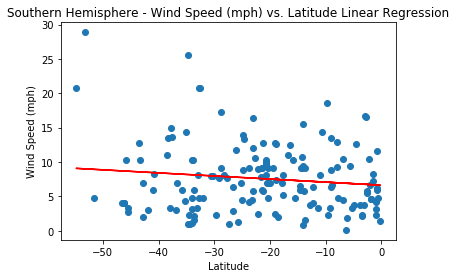

In [24]:
Lin_Reg(Southern_df["Latitude"],Southern_df["Wind Speed"])

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()